In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [6]:
import load_data as ld
from eden.graph import Vectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math

In [18]:
#name = "generate_graphs/125_pos_neg_BALANCED(2038)" #Leukemia
#name = "generate_graphs/489028_pos_neg_BALANCED(2864)" #Cancer
#name = "generate_graphs/1111_pos_neg_BALANCED" # AIDS
#name = "generate_graphs/2222_pos_neg_(BALANCED)" # PROTEINS
#name = "generate_graphs/3333_pos_neg_(BALANCED)" # DHFR

n_bits = [2,4,6,8,10,12,14,16,18]
acc_prot = run(name,
           nbits = n_bits,
           n_times = 5,
           complexity = 2)


 LEUKEMUA


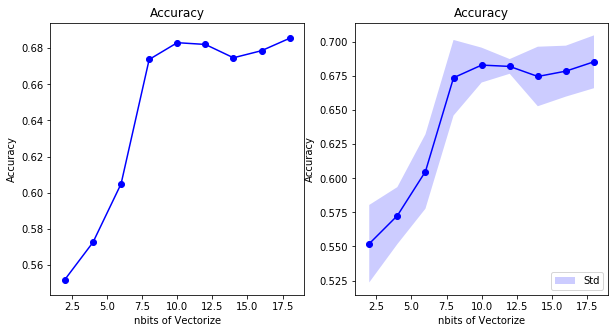


 CANCER


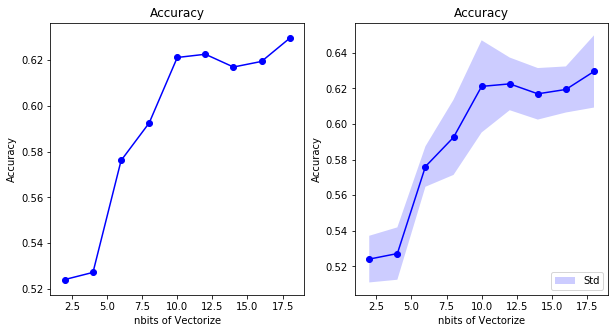


 AIDS


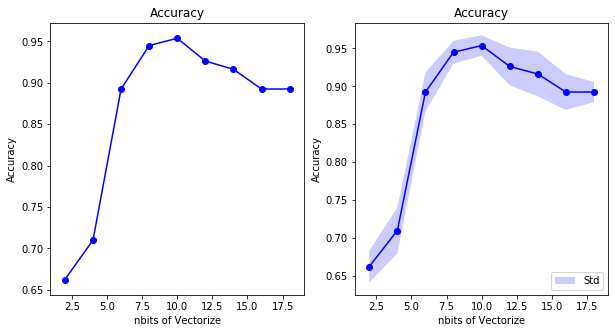


 DHFR


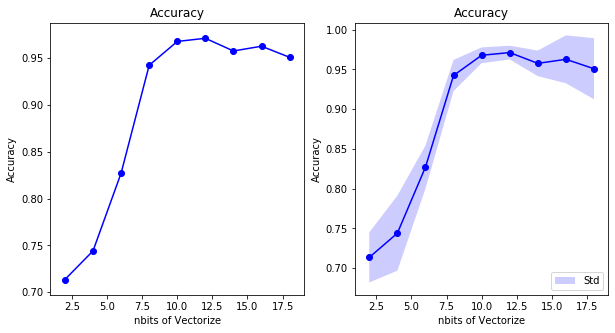


 PROTEINS


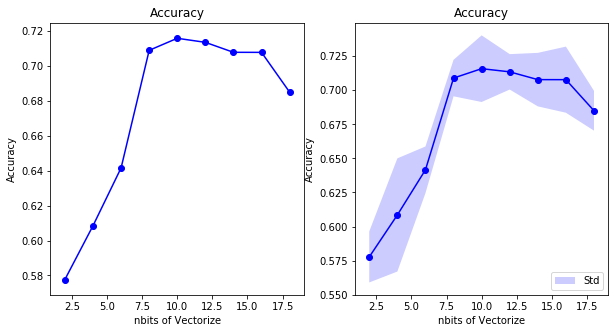

In [17]:
print("\n LEUKEMUA")
plot_nbits(acc_leuk,n_bits)
print("\n CANCER")
plot_nbits(acc_can,n_bits)
print("\n AIDS")
plot_nbits(acc_aids,n_bits)
print("\n DHFR")
plot_nbits(acc_dhfr,n_bits)
print("\n PROTEINS")
plot_nbits(acc_prot,n_bits)

In [3]:
def plot_nbits(metric,n_bits,text="Accuracy"):
    

    
    mean = []
    std = []
    for i in metric:
        mean.append(np.mean(i))
        std.append(np.std(i))

    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title(text)
    plt.plot(n_bits,mean,color='b')
    plt.scatter(n_bits,mean,color='b')
    #plt.xscale('log')
    plt.xlabel("nbits of Vectorize")
    plt.ylabel("Accuracy")


    plt.subplot(122)
    plt.title(text)
    plt.plot(n_bits,mean,color='b')
    plt.scatter(n_bits,mean,color='b')
    low = [mean[i]-std[i] for i in range(0,len(mean))] 
    upp = [mean[i]+std[i] for i in range(0,len(mean))]
    plt.fill_between(n_bits,low,upp, facecolor='b', label='Std',alpha=0.2)
    #plt.xscale('log')
    plt.xlabel("nbits of Vectorize")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.show()

In [4]:
import networkx as nx
def run(name,nbits,n_times,complexity=2):
    
    acc = []
    #graphs, labels = ld.load_data_pubchem(name)

    ##### solo su proteins 
    graphs_in, labels_in = ld.load_data_pubchem(name)
    graphs = []
    labels = []
    for i in range(len(graphs_in)):
        n_nodes = graphs_in[i].number_of_nodes() 
        if (n_nodes < 150):
            graphs.append(graphs_in[i])
            labels.append(labels_in[i])
            
    #graphs, labels = ld.load_data(name)
    
    
    for bits in nbits:
        vect = Vectorizer(complexity=complexity, nbits=bits)
        X = vect.transform(graphs)
        X = X.A
        clf = RandomForestClassifier(n_estimators=300, max_depth=2,random_state=0)
        scores = cross_val_score(clf, X, labels,scoring="accuracy",cv=n_times)

        print("n bit: "+str(bits))
        acc.append(scores)
        print(acc)
    
    return(acc)

In [15]:
acc_leuk = [[0.5735294117647058,
  0.553921568627451,
  0.5073529411764706,
  0.5367647058823529,
  0.5886699507389163],
 [0.5514705882352942,
  0.6029411764705882,
  0.5465686274509803,
  0.5808823529411765,
  0.5812807881773399],
 [0.6053921568627451,
  0.6568627450980392,
  0.5931372549019608,
  0.5906862745098039,
  0.5788177339901478],
 [0.6642156862745098,
  0.696078431372549,
  0.6642156862745098,
  0.6323529411764706,
  0.7118226600985221],
 [0.6838235294117647,
  0.7058823529411765,
  0.678921568627451,
  0.6666666666666666,
  0.6798029556650246],
 [0.6813725490196079,
  0.6887254901960784,
  0.6740196078431373,
  0.678921568627451,
  0.687192118226601],
 [0.6740196078431373,
  0.7058823529411765,
  0.6397058823529411,
  0.6862745098039216,
  0.6674876847290641],
 [0.6593137254901961,
  0.7107843137254902,
  0.6740196078431373,
  0.6862745098039216,
  0.6625615763546798],
 [0.6740196078431373,
  0.7181372549019608,
  0.6911764705882353,
  0.6838235294117647,
  0.6600985221674877]]


acc_can = [[0.5209059233449478,
  0.5087108013937283,
  0.513986013986014,
  0.5314685314685315,
  0.5454545454545454],
 [0.5209059233449478,
  0.554006968641115,
  0.513986013986014,
  0.5314685314685315,
  0.5157342657342657],
 [0.5871080139372822,
  0.573170731707317,
  0.5734265734265734,
  0.5891608391608392,
  0.5576923076923077],
 [0.6132404181184669,
  0.5871080139372822,
  0.5751748251748252,
  0.6206293706293706,
  0.5664335664335665],
 [0.6480836236933798,
  0.6428571428571429,
  0.6153846153846154,
  0.6241258741258742,
  0.5751748251748252],
 [0.627177700348432,
  0.6445993031358885,
  0.6153846153846154,
  0.6258741258741258,
  0.5996503496503497],
 [0.6306620209059234,
  0.627177700348432,
  0.6118881118881119,
  0.6241258741258742,
  0.5909090909090909],
 [0.6376306620209059,
  0.6236933797909407,
  0.6258741258741258,
  0.6013986013986014,
  0.6083916083916084],
 [0.6655052264808362,
  0.6306620209059234,
  0.6223776223776224,
  0.6258741258741258,
  0.6031468531468531]]


acc_aids = [[0.6875, 0.6875, 0.6375, 0.65, 0.65],
 [0.74375, 0.7, 0.65625, 0.725, 0.725],
 [0.8625, 0.8625, 0.925, 0.9125, 0.9],
 [0.9375, 0.93125, 0.95625, 0.96875, 0.93125],
 [0.95, 0.94375, 0.975, 0.9625, 0.9375],
 [0.90625, 0.94375, 0.94375, 0.95, 0.8875],
 [0.8875, 0.93125, 0.95, 0.9375, 0.875],
 [0.86875, 0.9, 0.90625, 0.925, 0.8625],
 [0.88125, 0.89375, 0.9, 0.9125, 0.875]]


acc_dhfr = [[0.6694915254237288,
  0.711864406779661,
  0.7288135593220338,
  0.7627118644067796,
  0.6949152542372882],
 [0.6610169491525424,
  0.7288135593220338,
  0.788135593220339,
  0.788135593220339,
  0.7542372881355932],
 [0.8050847457627118,
  0.8305084745762712,
  0.8559322033898306,
  0.8559322033898306,
  0.788135593220339],
 [0.9067796610169492,
  0.940677966101695,
  0.9491525423728814,
  0.9491525423728814,
  0.9661016949152542],
 [0.9576271186440678,
  0.9576271186440678,
  0.9661016949152542,
  0.9830508474576272,
  0.9745762711864406],
 [0.9576271186440678,
  0.9745762711864406,
  0.9661016949152542,
  0.9745762711864406,
  0.9830508474576272],
 [0.9576271186440678,
  0.9322033898305084,
  0.9576271186440678,
  0.9576271186440678,
  0.9830508474576272],
 [0.9067796610169492,
  0.9576271186440678,
  0.9745762711864406,
  0.9915254237288136,
  0.9830508474576272],
 [0.8813559322033898,
  0.940677966101695,
  0.9745762711864406,
  0.9915254237288136,
  0.9661016949152542]]

acc_prot = [[0.5738636363636364,
  0.5454545454545454,
  0.5771428571428572,
  0.6,
  0.5919540229885057],
 [0.5965909090909091,
  0.6193181818181818,
  0.5371428571428571,
  0.6628571428571428,
  0.6264367816091954],
 [0.6079545454545454,
  0.6477272727272727,
  0.6457142857142857,
  0.6514285714285715,
  0.6551724137931034],
 [0.6988636363636364,
  0.7159090909090909,
  0.7085714285714285,
  0.6914285714285714,
  0.7298850574712644],
 [0.7045454545454546,
  0.6761363636363636,
  0.7485714285714286,
  0.72,
  0.7298850574712644],
 [0.7159090909090909,
  0.7045454545454546,
  0.7142857142857143,
  0.6971428571428572,
  0.735632183908046],
 [0.7272727272727273,
  0.6704545454545454,
  0.7142857142857143,
  0.7085714285714285,
  0.7183908045977011],
 [0.7329545454545454,
  0.6818181818181818,
  0.7371428571428571,
  0.68,
  0.7068965517241379],
 [0.6704545454545454,
  0.6761363636363636,
  0.7085714285714285,
  0.6742857142857143,
  0.6954022988505747]]

In [ ]:
#### scores 

'''

Random Forest 300 
Complexity 2

name = "generate_graphs/125_pos_neg_BALANCED(2038)" #Leukemia

n_bits = [2,4,6,8,10,12,14,16,18]
acc_leuk = run(name,
           nbits = n_bits,
           n_times = 5,
           complexity = 2)

[[0.5735294117647058,
  0.553921568627451,
  0.5073529411764706,
  0.5367647058823529,
  0.5886699507389163],
 [0.5514705882352942,
  0.6029411764705882,
  0.5465686274509803,
  0.5808823529411765,
  0.5812807881773399],
 [0.6053921568627451,
  0.6568627450980392,
  0.5931372549019608,
  0.5906862745098039,
  0.5788177339901478],
 [0.6642156862745098,
  0.696078431372549,
  0.6642156862745098,
  0.6323529411764706,
  0.7118226600985221],
 [0.6838235294117647,
  0.7058823529411765,
  0.678921568627451,
  0.6666666666666666,
  0.6798029556650246],
 [0.6813725490196079,
  0.6887254901960784,
  0.6740196078431373,
  0.678921568627451,
  0.687192118226601],
 [0.6740196078431373,
  0.7058823529411765,
  0.6397058823529411,
  0.6862745098039216,
  0.6674876847290641],
 [0.6593137254901961,
  0.7107843137254902,
  0.6740196078431373,
  0.6862745098039216,
  0.6625615763546798],
 [0.6740196078431373,
  0.7181372549019608,
  0.6911764705882353,
  0.6838235294117647,
  0.6600985221674877]]


name = "generate_graphs/489028_pos_neg_BALANCED(2864)" #Cancer

n_bits = [2,4,6,8,10,12,14,16,18]
acc_can = run(name,
           nbits = n_bits,
           n_times = 5,
           complexity = 2)

[[0.5209059233449478,
  0.5087108013937283,
  0.513986013986014,
  0.5314685314685315,
  0.5454545454545454],
 [0.5209059233449478,
  0.554006968641115,
  0.513986013986014,
  0.5314685314685315,
  0.5157342657342657],
 [0.5871080139372822,
  0.573170731707317,
  0.5734265734265734,
  0.5891608391608392,
  0.5576923076923077],
 [0.6132404181184669,
  0.5871080139372822,
  0.5751748251748252,
  0.6206293706293706,
  0.5664335664335665],
 [0.6480836236933798,
  0.6428571428571429,
  0.6153846153846154,
  0.6241258741258742,
  0.5751748251748252],
 [0.627177700348432,
  0.6445993031358885,
  0.6153846153846154,
  0.6258741258741258,
  0.5996503496503497],
 [0.6306620209059234,
  0.627177700348432,
  0.6118881118881119,
  0.6241258741258742,
  0.5909090909090909],
 [0.6376306620209059,
  0.6236933797909407,
  0.6258741258741258,
  0.6013986013986014,
  0.6083916083916084],
 [0.6655052264808362,
  0.6306620209059234,
  0.6223776223776224,
  0.6258741258741258,
  0.6031468531468531]]





name = "generate_graphs/1111_pos_neg_BALANCED" # AIDS
n_bits = [2,4,6,8,10,12,14,16,18]
acc_aids = run(name,
           nbits = n_bits,
           n_times = 5,
           complexity = 2)
[[0.6875, 0.6875, 0.6375, 0.65, 0.65],
 [0.74375, 0.7, 0.65625, 0.725, 0.725],
 [0.8625, 0.8625, 0.925, 0.9125, 0.9],
 [0.9375, 0.93125, 0.95625, 0.96875, 0.93125],
 [0.95, 0.94375, 0.975, 0.9625, 0.9375],
 [0.90625, 0.94375, 0.94375, 0.95, 0.8875],
 [0.8875, 0.93125, 0.95, 0.9375, 0.875],
 [0.86875, 0.9, 0.90625, 0.925, 0.8625],
 [0.88125, 0.89375, 0.9, 0.9125, 0.875]]



name = "generate_graphs/2222_pos_neg_(BALANCED)" # PROTEINS
n_bits = [2,4,6,8,10,12,14,16,18]
acc_proteins = run(name,
           nbits = n_bits,
           n_times = 5,
           complexity = 2)
[[0.5738636363636364,
  0.5454545454545454,
  0.5771428571428572,
  0.6,
  0.5919540229885057],
 [0.5965909090909091,
  0.6193181818181818,
  0.5371428571428571,
  0.6628571428571428,
  0.6264367816091954],
 [0.6079545454545454,
  0.6477272727272727,
  0.6457142857142857,
  0.6514285714285715,
  0.6551724137931034],
 [0.6988636363636364,
  0.7159090909090909,
  0.7085714285714285,
  0.6914285714285714,
  0.7298850574712644],
 [0.7045454545454546,
  0.6761363636363636,
  0.7485714285714286,
  0.72,
  0.7298850574712644],
 [0.7159090909090909,
  0.7045454545454546,
  0.7142857142857143,
  0.6971428571428572,
  0.735632183908046],
 [0.7272727272727273,
  0.6704545454545454,
  0.7142857142857143,
  0.7085714285714285,
  0.7183908045977011],
 [0.7329545454545454,
  0.6818181818181818,
  0.7371428571428571,
  0.68,
  0.7068965517241379],
 [0.6704545454545454,
  0.6761363636363636,
  0.7085714285714285,
  0.6742857142857143,
  0.6954022988505747]]






name = "generate_graphs/3333_pos_neg_(BALANCED)" # DHFR
n_bits = [2,4,6,8,10,12,14,16,18]
acc_dhfr = run(name,
           nbits = n_bits,
           n_times = 5,
           complexity = 2)

[[0.6694915254237288,
  0.711864406779661,
  0.7288135593220338,
  0.7627118644067796,
  0.6949152542372882],
 [0.6610169491525424,
  0.7288135593220338,
  0.788135593220339,
  0.788135593220339,
  0.7542372881355932],
 [0.8050847457627118,
  0.8305084745762712,
  0.8559322033898306,
  0.8559322033898306,
  0.788135593220339],
 [0.9067796610169492,
  0.940677966101695,
  0.9491525423728814,
  0.9491525423728814,
  0.9661016949152542],
 [0.9576271186440678,
  0.9576271186440678,
  0.9661016949152542,
  0.9830508474576272,
  0.9745762711864406],
 [0.9576271186440678,
  0.9745762711864406,
  0.9661016949152542,
  0.9745762711864406,
  0.9830508474576272],
 [0.9576271186440678,
  0.9322033898305084,
  0.9576271186440678,
  0.9576271186440678,
  0.9830508474576272],
 [0.9067796610169492,
  0.9576271186440678,
  0.9745762711864406,
  0.9915254237288136,
  0.9830508474576272],
 [0.8813559322033898,
  0.940677966101695,
  0.9745762711864406,
  0.9915254237288136,
  0.9661016949152542]]

'''
